<b><font size=5>Содержание</font></b><a name="to_content."></a>

[1. Знакомство с данными](#1.)  
[2. Подготовка данных](#2.)  
[3. Исследовательский анализ данных](#3.)  
[4. Портрет пользователя каждого региона](#4.)  
[5. Проверка гипотез](#5.)  
[6. Общий вывод](#6.)

# ВЫПОЛНЕНИЕ ПРОЕКТА
***
## Шаг 1. Знакомство с данными<a name="1.">
[<font size="2">(к содержанию)</font>](#to_content.)

Импортируем библиотеку пандас и ознакомимся с данными.

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/games.csv')
display(df)
print(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Данные не полные, часть столбцов заполнена частично. В глаза бросаются NaN'ы. 
Так же есть ошибки в типах данных - в столбце **Year_of_Release** год имеет тип **float**, столбец User_Score имеет тип данных **object** вместо **float**.

## Шаг 2. Подготовка данных<a name="2.">
[<font size="2">(к содержанию)</font>](#to_content.)

Сразу проверим таблицу на наличие дубликатов.

In [2]:
df.duplicated().sum()

0

Приведём названия столбцов к нижнему регистру.

In [3]:
df.columns = df.columns.str.lower()
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим значение **tbd** в столбце с рейтингом.

In [4]:
df.loc[df.loc[:, 'user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Судя по всему, это значит **to be determined** - то есть будетопределено. Видимо, оно пока неизвестно, но его планируют получитьв будущем. Анализ мы проводим сейчас, и раз его нет, значит нет. Приведём столбец к числовым данным и сразу избавимся от неопределённости.

In [5]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Чтобы привести столбец с годом к типу **int**, надо избавиться от пропусков (иначе не получилось - только **float**). Заполним пропуски нулями, и в будущем будем понимать, что нулевой год, это неизвестный.  

Другие пропуски заполнять не буду, так как их слишком много, и адекватного способа, не искажающего картину, для них нет, так как все эти переменные количественные. Будем работать с тем, что есть.

In [6]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int64')
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

Добавим вычисляемый столбец с общей цифрой продаж, суммировав значения из остальных столбцов.

In [7]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Шаг 3. Исследовательский анализ данных <a name="3.">
[<font size="2">(к содержанию)</font>](#to_content.)

Сделаем сводную таблицу - сведём данные о количестве вышедших игр по годам.

In [8]:
games_per_years = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count').sort_values('name', 
                                                                                                          ascending=False)
display(games_per_years)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


Избавимся от индексов, для удобства построения гистограммы.

In [9]:
games_per_years.reset_index(inplace=True)

Импортируем модуль `pyplot` из библиотеки **matplotlib**, для удобства построения графиков.  
Отсортируем значения по годам и построим гистограмму.

In [10]:
import matplotlib.pyplot as plt
games_per_years = games_per_years.sort_values('year_of_release')

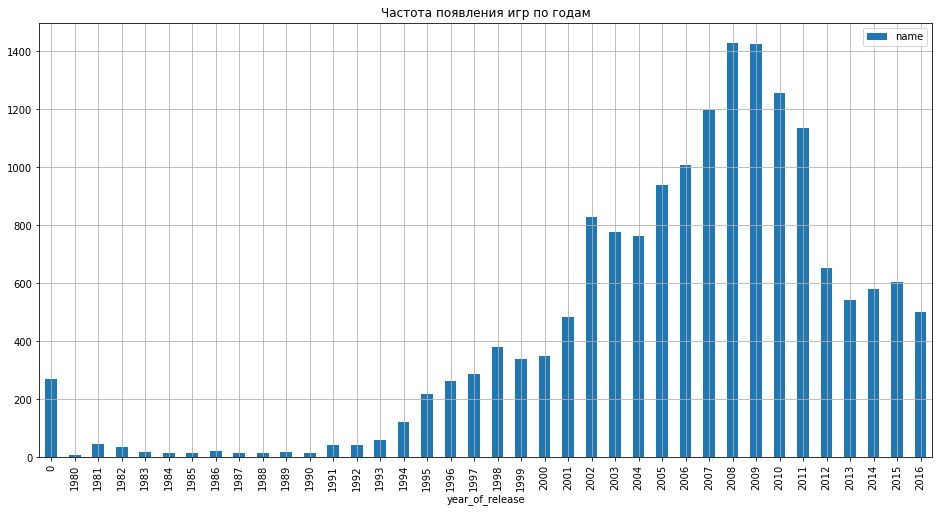

In [11]:
games_per_years.plot(x='year_of_release', y='name', kind='bar', grid=True, title='Частота появления игр по годам', 
                     figsize=(16, 8))
plt.show()

На графике видно, что ранее игр выходило мало. В 1994 году их производство удвоилось по сравнению с прошлым годом, в 1995 снова удвоилось, и далее неуклонно росло, до "взрыва" в начале 2000-х. В начале 2010-х оно быстро пошло на спад. Или общество пресытилось ими, или у него просто устоялся вкус, или определились основные производители, потеснившие остальных, малорентабельных коллег.  

Теперь сгруппируем данные по платформам, и посмотрим какие из них самые востребованные.

In [12]:
platform_sales = pd.pivot_table(df, index='platform', values='total_sales', 
                                aggfunc='sum').sort_values('total_sales', ascending=False)
display(platform_sales)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Отберём топ. Видно, что первые 6 значений значительно выше остальных (7-е меньше уже более чем в 2 раза) - их и считаем топом. В нашем случае, тех, чьи продажи превышают 700 млн. копий (ну, или первые 6 строк через `loc`, если важно именно так).

In [13]:
platform_sales = platform_sales.query('total_sales > 700')
platform_sales.reset_index(inplace=True)
display(platform_sales)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


Построим гистограмму для каждой из топовых платформ, предварительно группируя данные через сводные таблицы. Для удобства используем цикл.

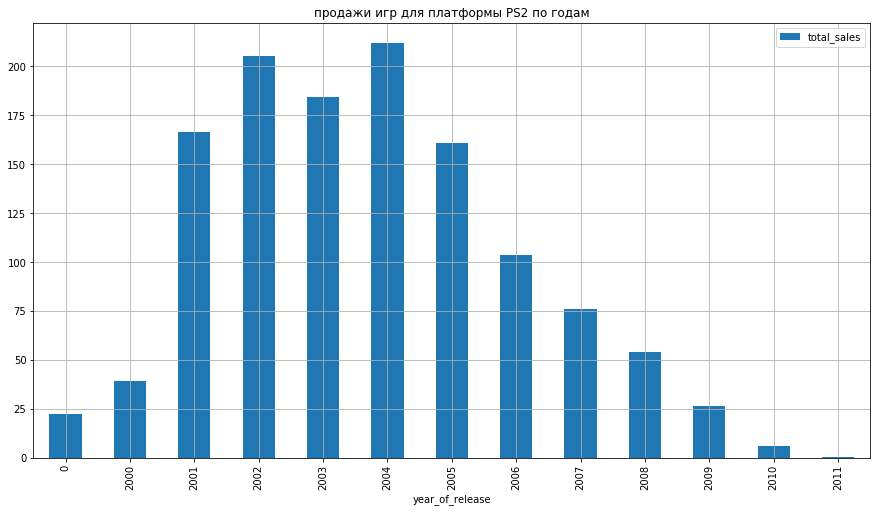

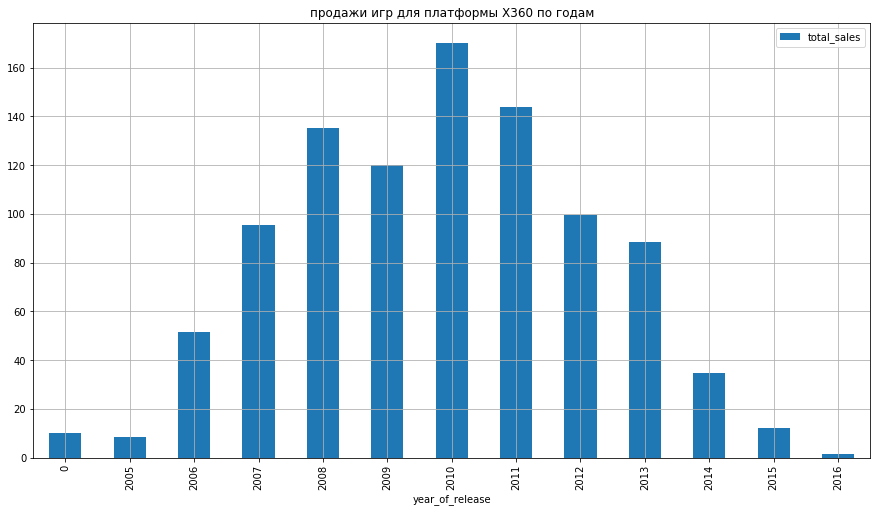

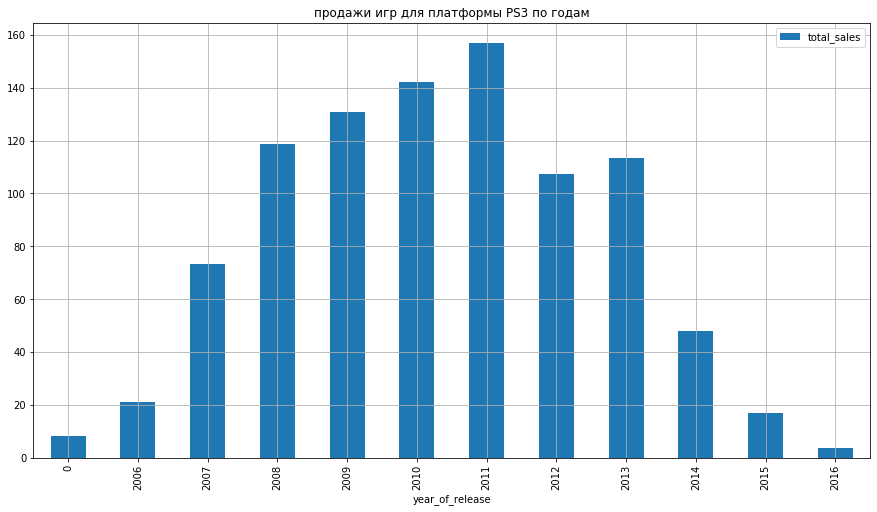

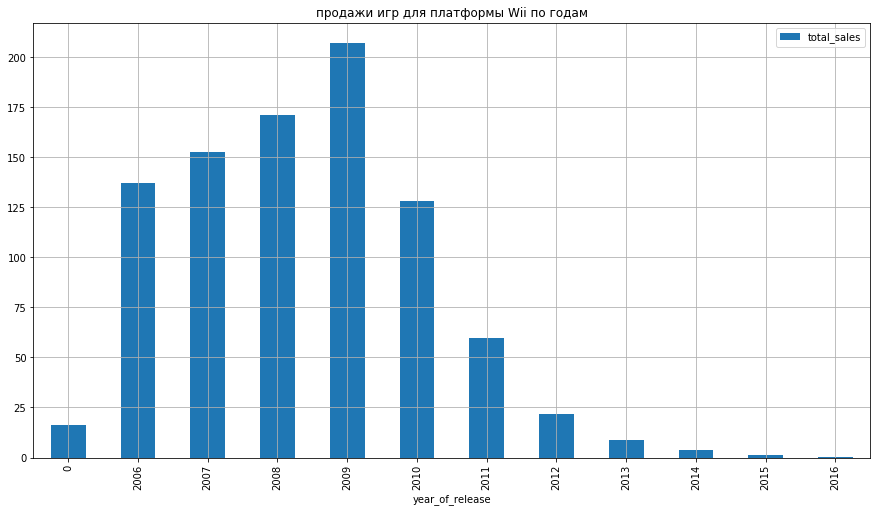

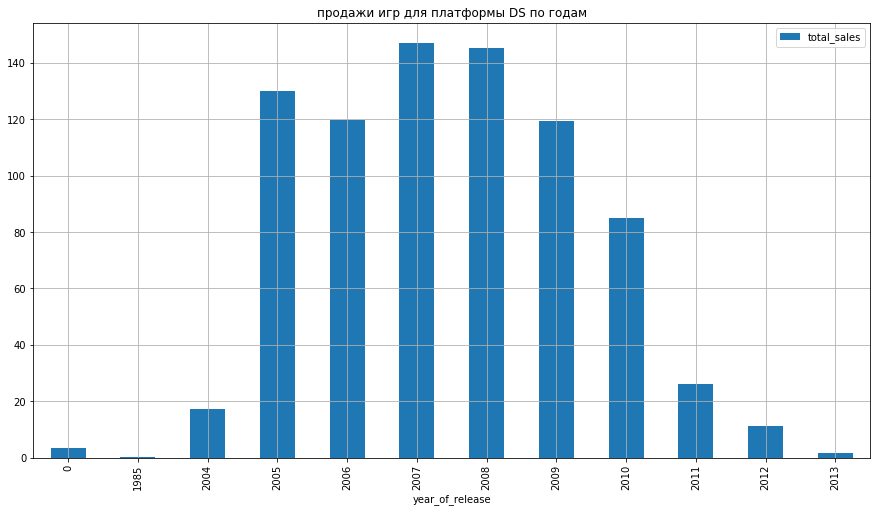

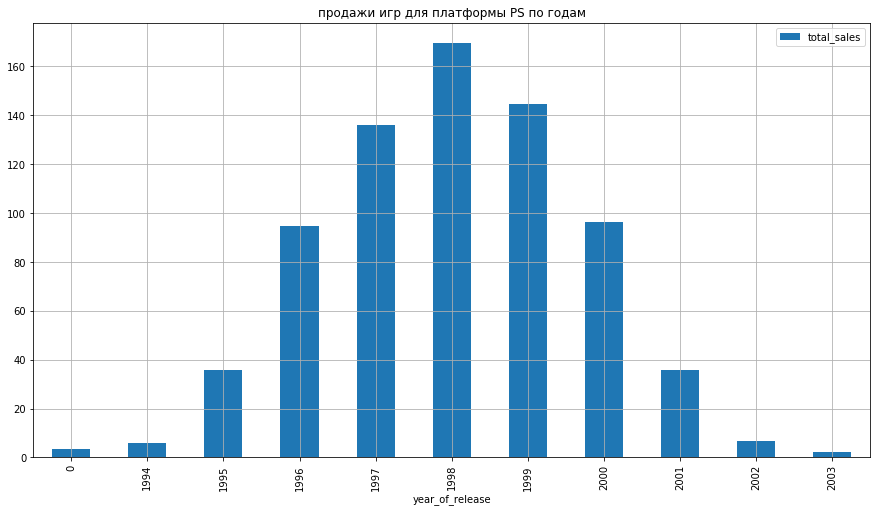

In [14]:
for i in platform_sales['platform'].unique():
    b = pd.pivot_table(df[df['platform'] == i], index='year_of_release', values='total_sales', aggfunc='sum')
    b.reset_index(inplace=True)
    b.plot(x='year_of_release', y='total_sales', kind='bar', grid=True, title='продажи игр для платформы {} по годам'.format(i), figsize=(15, 8))

Средний пик - от расцвета по почти полного  угасания платформы - 9 лет.  
Отберём данные, начиная с 2008 года, так как только они помогут нам в определении тенденций 2017 года. Данные за прошлые периоды больше не используем.
Посмотрим, какое количество игр было продано для каждой платформы за последние 9 лет.

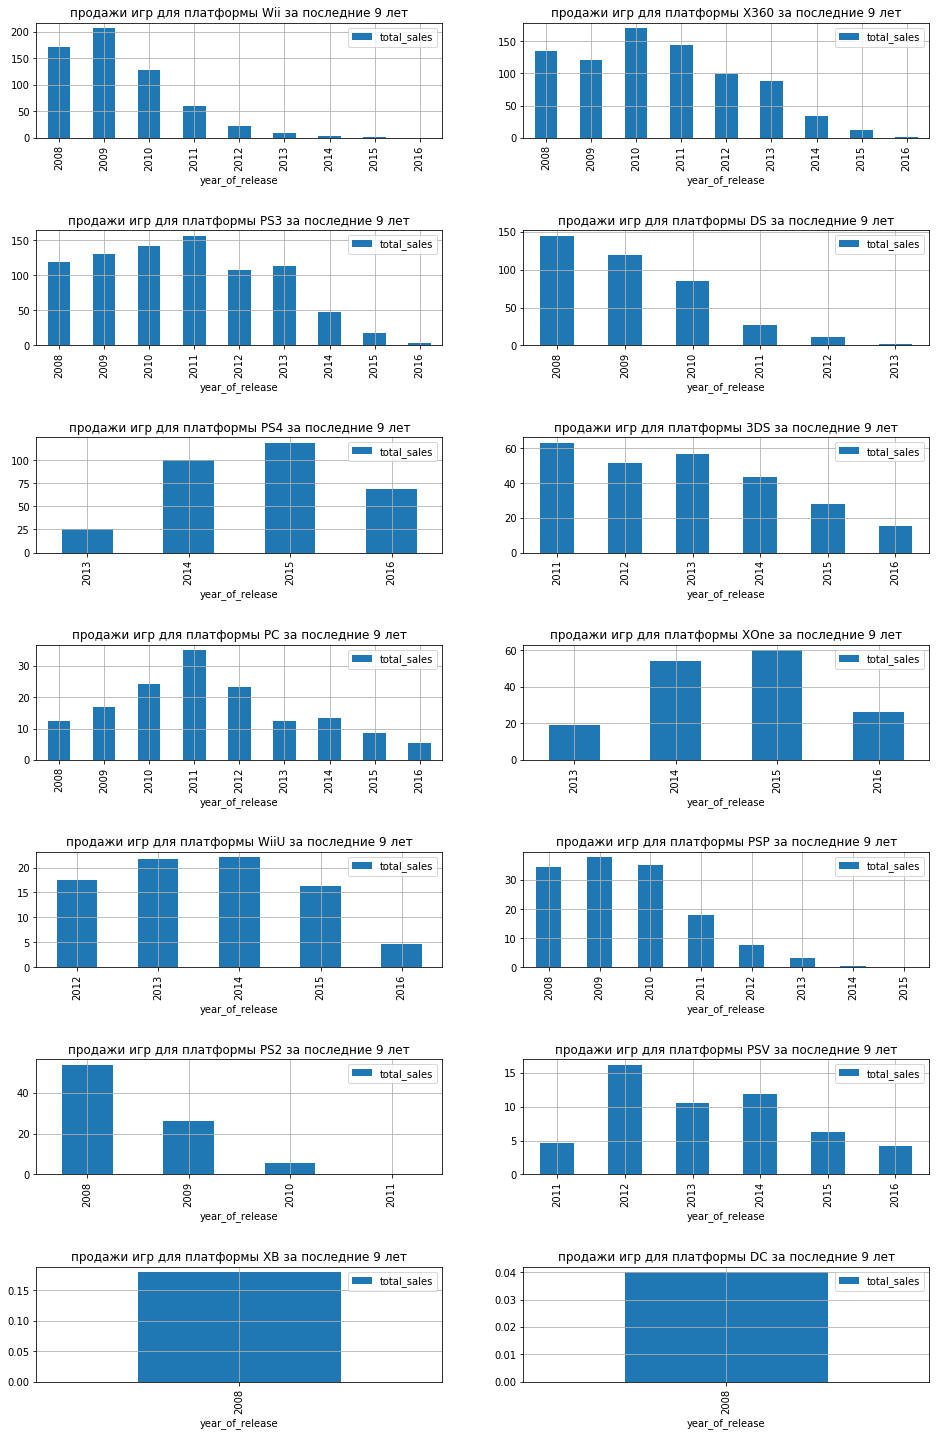

In [46]:
last_years = df.query('year_of_release > 2007')
rows = 7
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(16,25))
fig.subplots_adjust(hspace=.8)
counter = 0

for r in range(rows):
    for c in range(cols):
        current_platform = last_years['platform'].unique()[counter]
        b = pd.pivot_table(last_years[last_years['platform'] == current_platform], 
                           index='year_of_release', values='total_sales', aggfunc='sum')
        b.reset_index(inplace=True)
        b.plot(x='year_of_release', y='total_sales', kind='bar', grid=True, 
               title='продажи игр для платформы {} за последние 9 лет'.format(current_platform), ax=axes[r,c])
        counter += 1

На графиках видно, что значительно упали продажи для платформ **PS2**, **PS3**, **X360**, **Wii**, **DS** и **PSP**, и перерестали выпускаться игры для платформ **XB** и **DC**.

Теперь построим "ящики с усами", чтобы увидеть распределение общего количества продаж для разных платформ. Для этого импортируем библиотеку **seaborn**.

In [17]:
import seaborn as sns

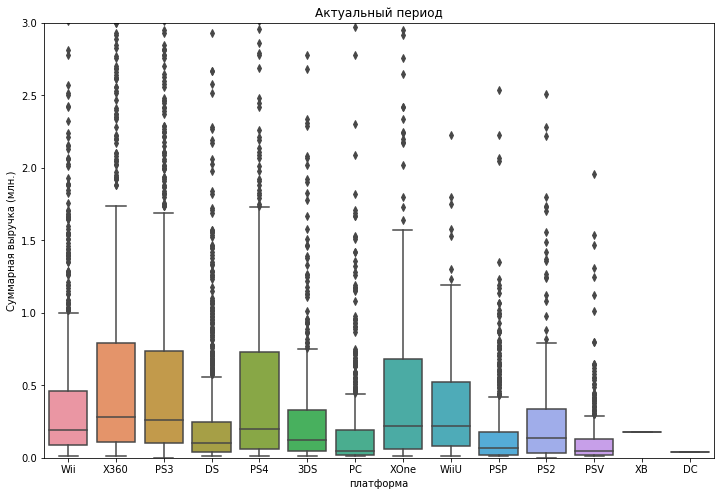

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x="platform", y="total_sales", data=last_years)
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 3])
plt.show()

Видно, что нигде медиана не превышает 0,5 млн. и много выбросов для каждой платформы.

Теперь, опять с помощью цикла, построим диаграммы рассеяния общего количества продаж для каждой платформы, в зависимости от оценки пользователей и критиков. Так же посчитаем коэффициенты корреляции.

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы Wii зависимость продаж от оценки пользователей
Коэффициент корреляции 0.13024203026623343


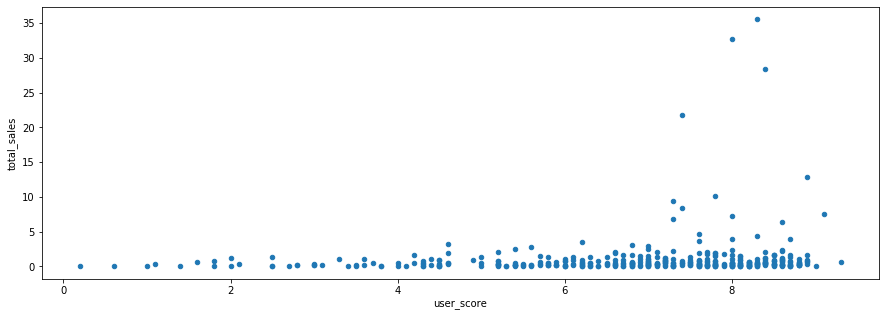

Диаграмма рассеяния для платформы Wii зависимость продаж от оценки критиков
Коэффициент корреляции 0.2251085171069155


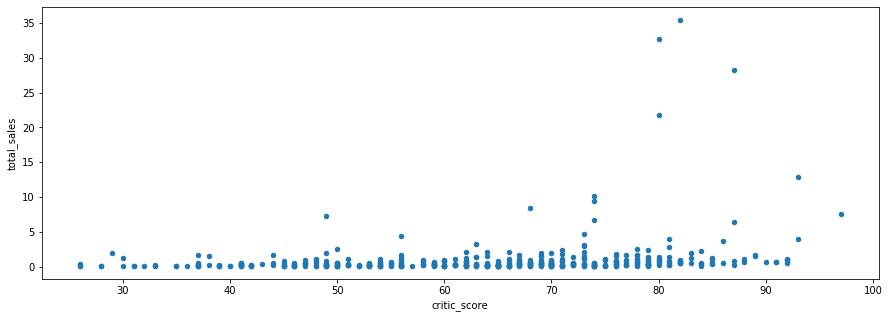

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы X360 зависимость продаж от оценки пользователей
Коэффициент корреляции 0.10110099387279448


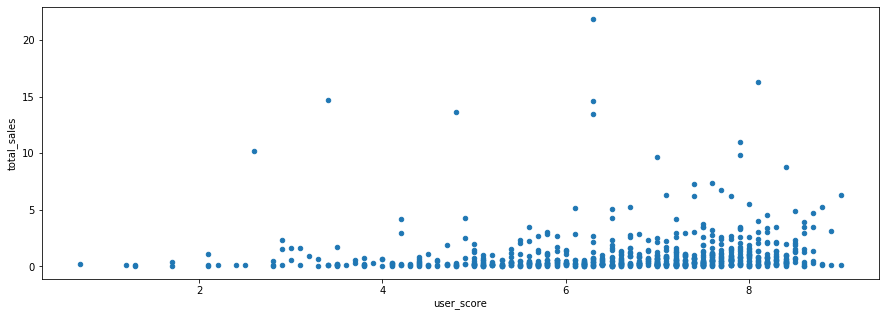

Диаграмма рассеяния для платформы X360 зависимость продаж от оценки критиков
Коэффициент корреляции 0.3886526625814236


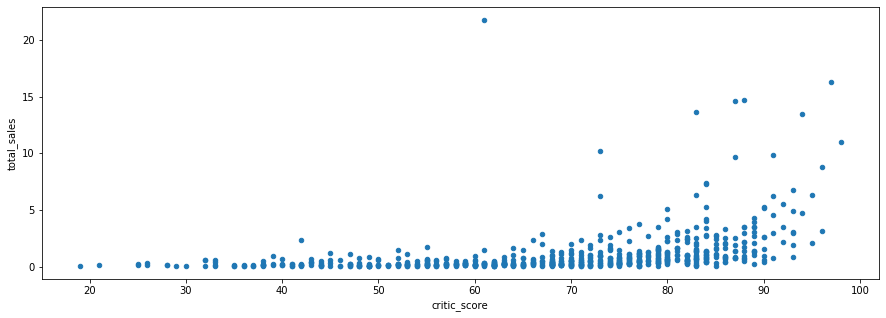

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы PS3 зависимость продаж от оценки пользователей
Коэффициент корреляции 0.11507962414430672


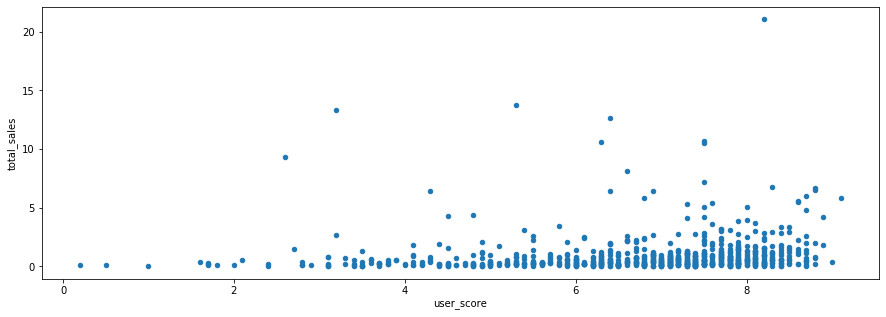

Диаграмма рассеяния для платформы PS3 зависимость продаж от оценки критиков
Коэффициент корреляции 0.43373151728268966


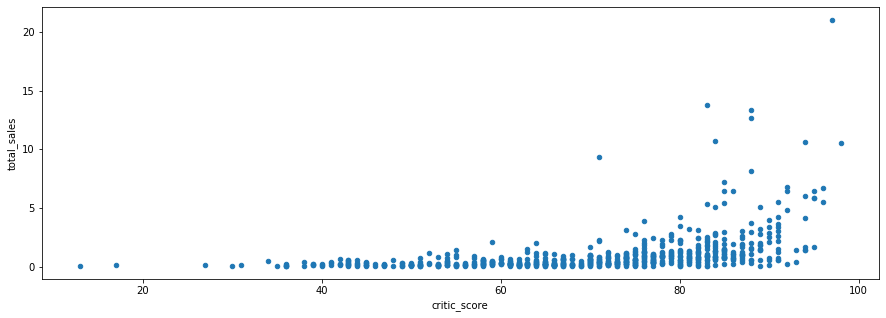

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы DS зависимость продаж от оценки пользователей
Коэффициент корреляции 0.19922302496645283


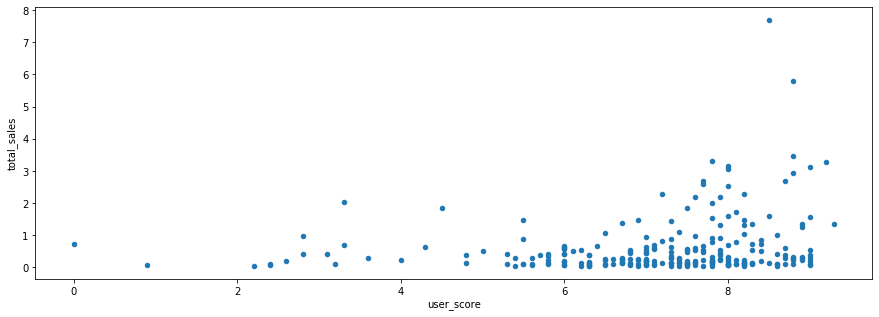

Диаграмма рассеяния для платформы DS зависимость продаж от оценки критиков
Коэффициент корреляции 0.3071390920453427


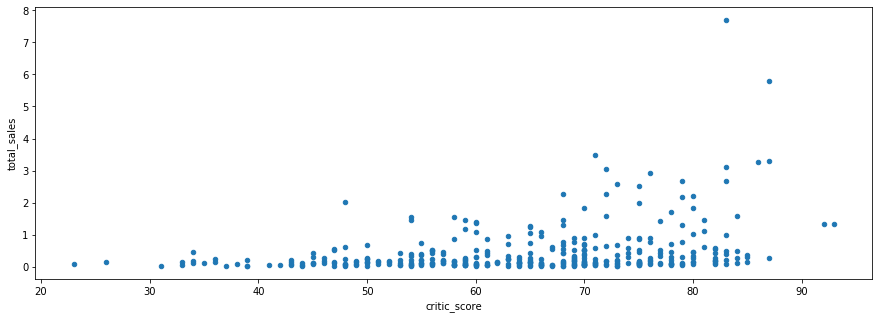

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы PS4 зависимость продаж от оценки пользователей
Коэффициент корреляции -0.031957110204556424


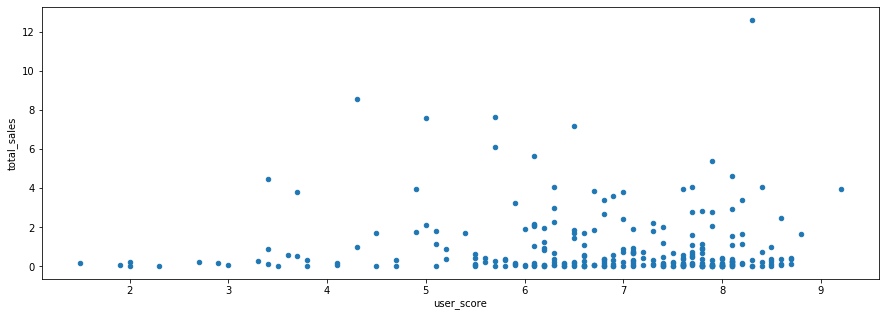

Диаграмма рассеяния для платформы PS4 зависимость продаж от оценки критиков
Коэффициент корреляции 0.406567902061781


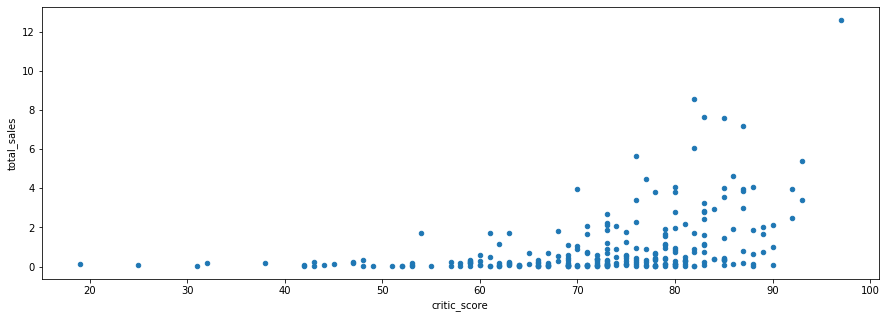

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы 3DS зависимость продаж от оценки пользователей
Коэффициент корреляции 0.22207843643390884


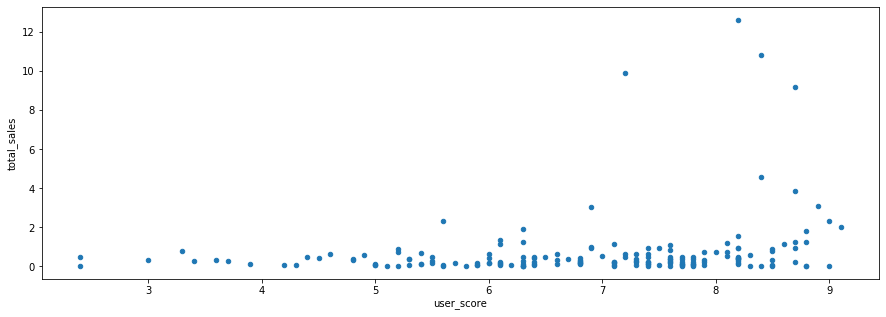

Диаграмма рассеяния для платформы 3DS зависимость продаж от оценки критиков
Коэффициент корреляции 0.34873973059848346


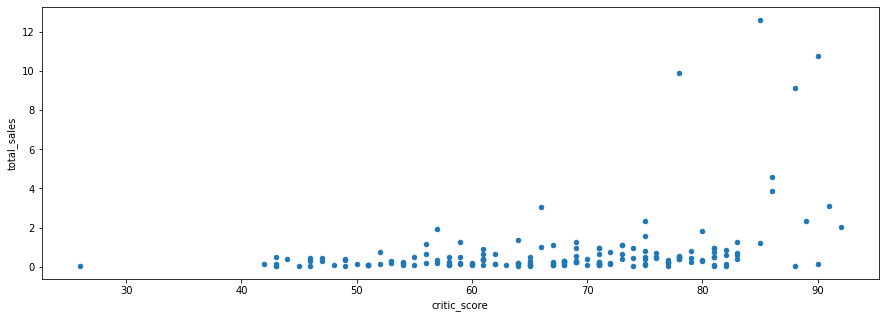

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы PC зависимость продаж от оценки пользователей
Коэффициент корреляции -0.01865012471759223


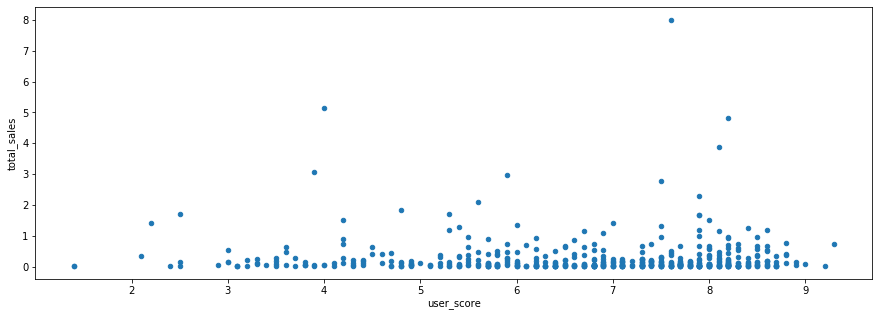

Диаграмма рассеяния для платформы PC зависимость продаж от оценки критиков
Коэффициент корреляции 0.2974609078144443


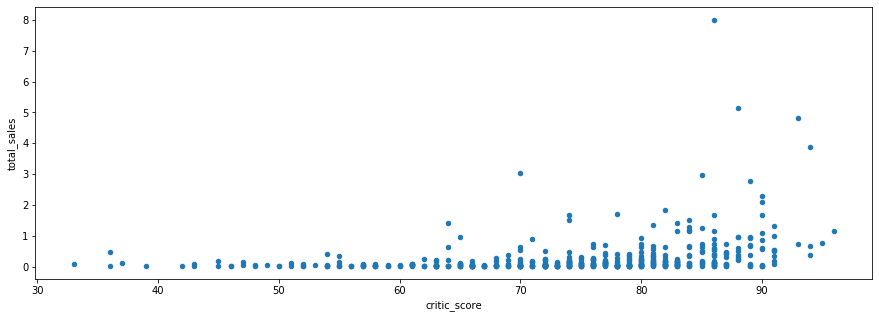

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы XOne зависимость продаж от оценки пользователей
Коэффициент корреляции -0.06892505328279412


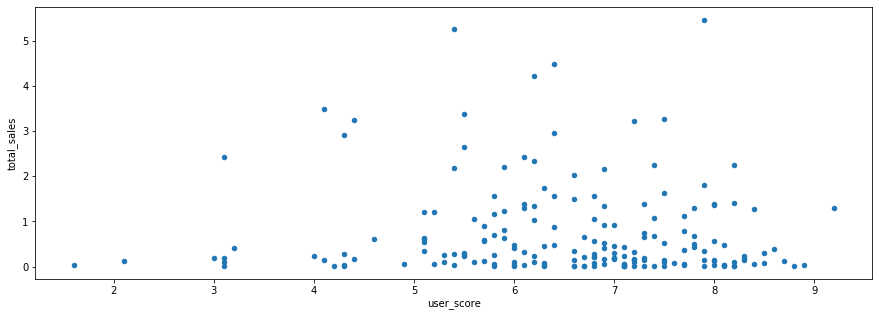

Диаграмма рассеяния для платформы XOne зависимость продаж от оценки критиков
Коэффициент корреляции 0.41699832800840175


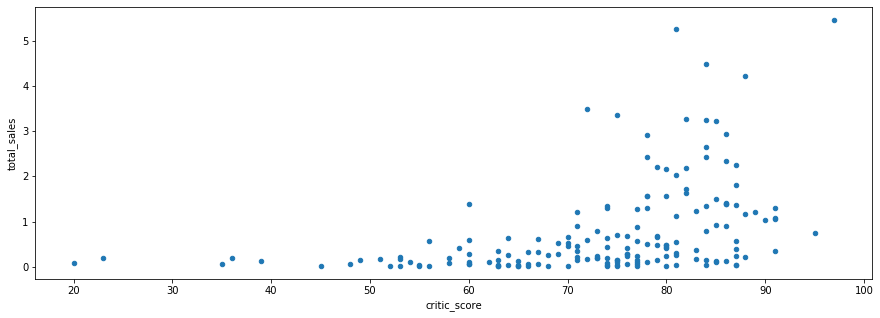

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы WiiU зависимость продаж от оценки пользователей
Коэффициент корреляции 0.4002190202148617


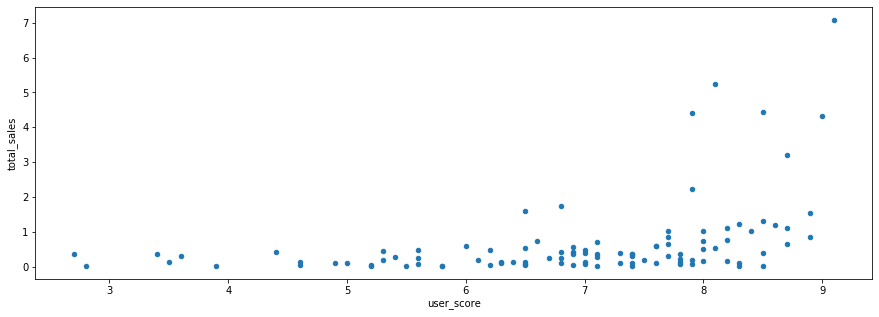

Диаграмма рассеяния для платформы WiiU зависимость продаж от оценки критиков
Коэффициент корреляции 0.3483797601201749


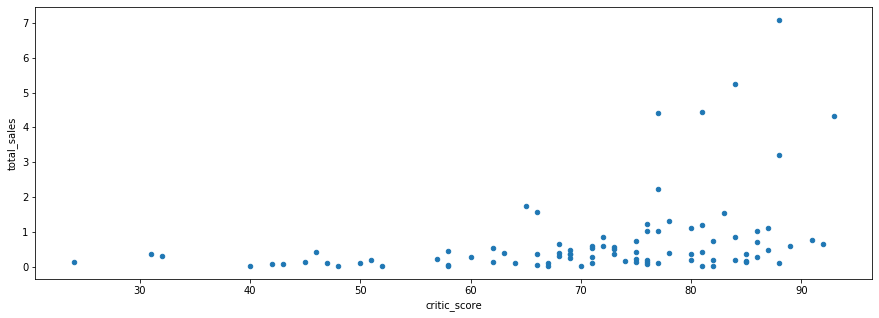

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы PSP зависимость продаж от оценки пользователей
Коэффициент корреляции 0.21656156902299611


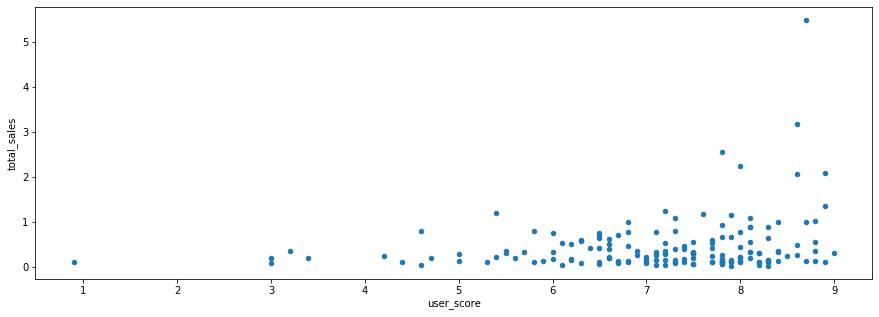

Диаграмма рассеяния для платформы PSP зависимость продаж от оценки критиков
Коэффициент корреляции 0.33468103952904893


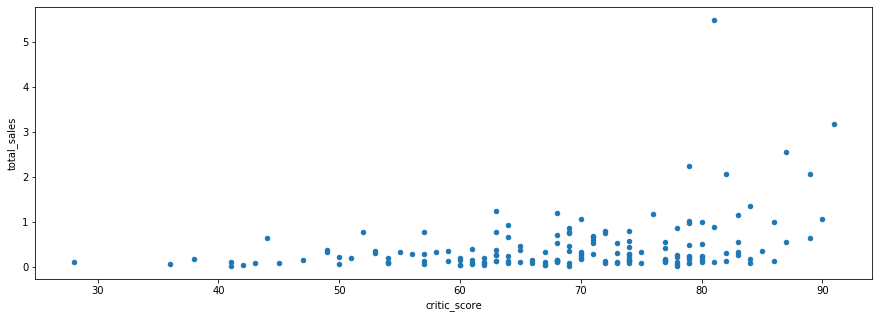

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы PS2 зависимость продаж от оценки пользователей
Коэффициент корреляции 0.1223723901293979


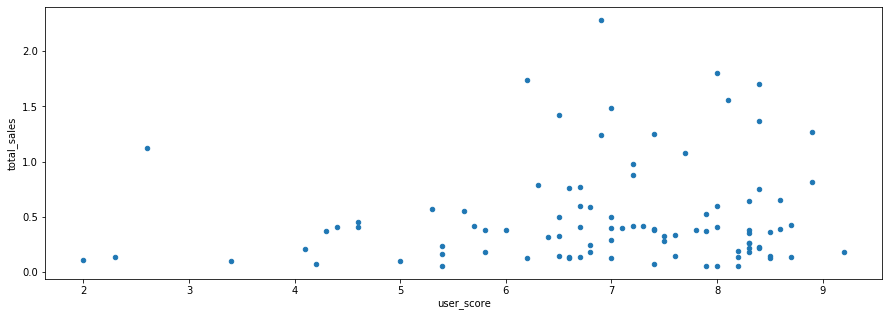

Диаграмма рассеяния для платформы PS2 зависимость продаж от оценки критиков
Коэффициент корреляции 0.3448311544391287


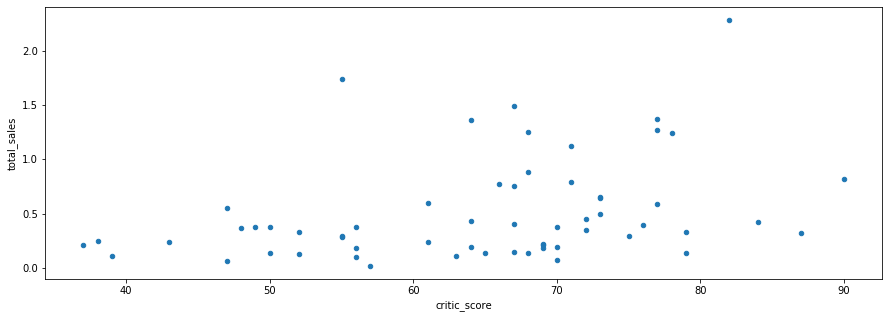

--------------------------------------------------------------------------------
Диаграмма рассеяния для платформы PSV зависимость продаж от оценки пользователей
Коэффициент корреляции 0.013488756835886498


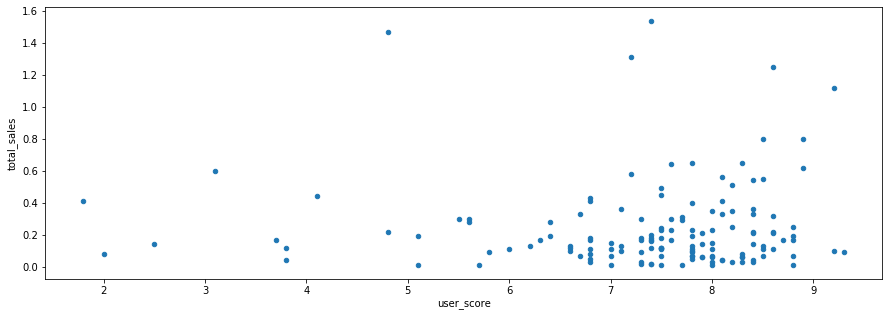

Диаграмма рассеяния для платформы PSV зависимость продаж от оценки критиков
Коэффициент корреляции 0.13176292727608935


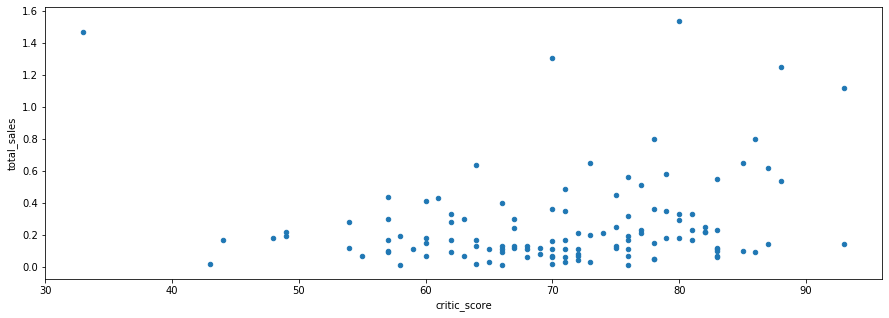

In [19]:
for i in last_years['platform'].unique():
    if len(last_years[last_years['platform'] == i]) > 1:
        print('--------------------------------------------------------------------------------')
        print('Диаграмма рассеяния для платформы', i, 'зависимость продаж от оценки пользователей')
        print('Коэффициент корреляции', last_years[last_years['platform'] == i]['total_sales'].corr(last_years['user_score']))
        last_years[last_years['platform'] == i].plot(x='user_score', y='total_sales', kind='scatter', figsize=(15, 5))
        plt.show()
        print('Диаграмма рассеяния для платформы', i, 'зависимость продаж от оценки критиков')
        print('Коэффициент корреляции', last_years[last_years['platform'] == i]['total_sales'].corr(last_years['critic_score']))
        last_years[last_years['platform'] == i].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15, 5))
        plt.show()
    else:
        continue

Видно, что зависимость есть. Особенно в случае с критиками. С пользователями не так сильно выражена, ибо это дело более субъективное. Или это может быть связано с нехваткой данных.

Теперь, сгруппируем данные по жанрам, и посчитаем количество выпущенных игр для каждого и общее количество проданных копий.

In [20]:
genre_sales = pd.pivot_table(last_years, index='genre', values=['total_sales', 'name'], aggfunc={'total_sales':'sum', 'name':'count'}).sort_values('total_sales', ascending=False)
display(genre_sales)

,name,total_sales
genre,,
Action,1988,945.74
Shooter,583,608.19
Sports,958,560.34
Role-Playing,783,421.57
Misc,994,396.43
Racing,403,226.41
Platform,244,195.38
Simulation,459,150.78
Fighting,308,148.51


Самые популярные жанры это **'Action'**, **'Shooter'** и **'Sports'**.

Составим графики для каждого жанра, по количеству продаж за последние годы.

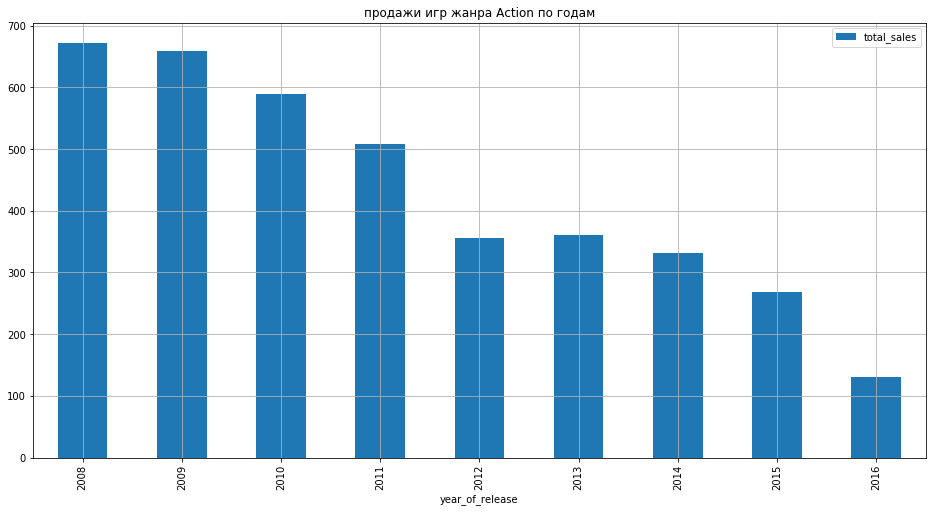

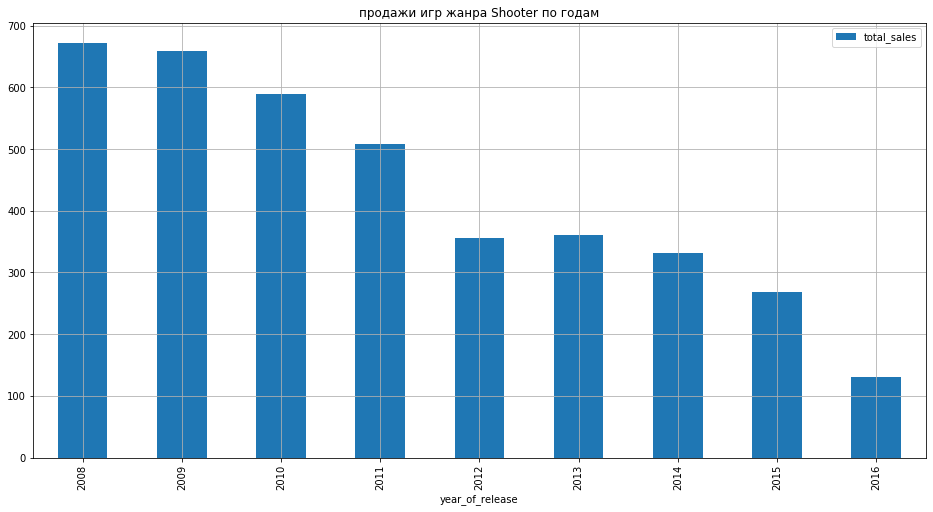

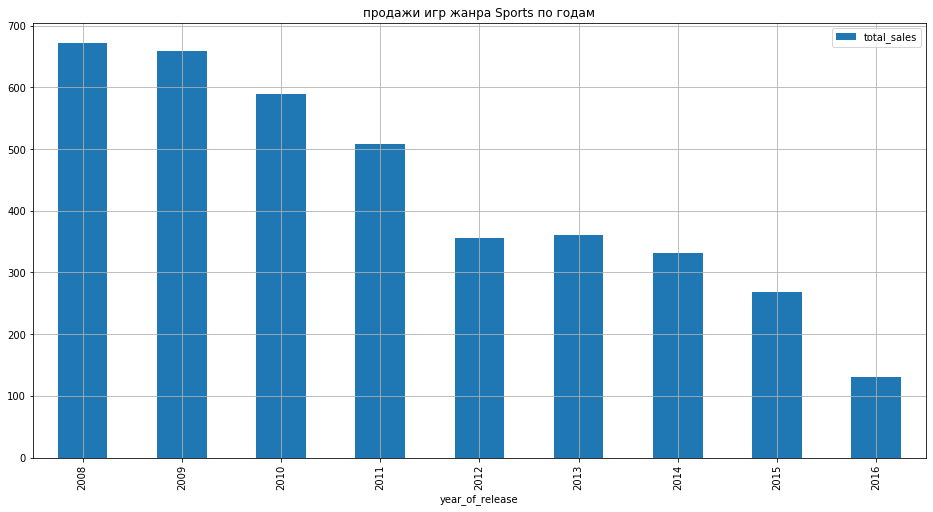

In [21]:
genres_top = ['Action', 'Shooter', 'Sports']
for i in genres_top:
    b = pd.pivot_table(last_years, index='year_of_release', values='total_sales', aggfunc='sum')
    b.reset_index(inplace=True)
    b.sort_values('year_of_release', ascending=False)
    b.plot(x='year_of_release', y='total_sales', kind='bar', grid=True, title='продажи игр жанра {} по годам'.format(i), 
           figsize=(16, 8))

Тенденции примерно одинаковые - сказался общий тренд на уменьшение количества покупаемых и выпускаемых игр. Все остановились на отметке ~125 млн копий.

## Шаг 4. Портрет пользователя каждого региона<a name="4.">
[<font size="2">(к содержанию)</font>](#to_content.)

Сгруппируем данные по платформам и жанрам для каждого региона, добавим столбцы с долями от общего колиества продаж, и составим гистограммы с количеством игр для каждой рейтинговой оценки ESRB, чтобы определить самые востребованные.


Топ- 5 игр региона na по платформам, с долями от продаж


,platform,na_sales,part_sales
0,X360,490.69,0.270405
1,PS3,349.13,0.192395
2,Wii,332.87,0.183435
3,DS,198.73,0.109514
4,PS4,108.74,0.059923



Топ- 5 игр региона na по жанрам, с долям от продаж


,genre,na_sales,part_sales
0,Action,433.74,0.239021
1,Shooter,311.26,0.171526
2,Sports,276.27,0.152244
3,Misc,211.61,0.116612
4,Role-Playing,155.81,0.085862


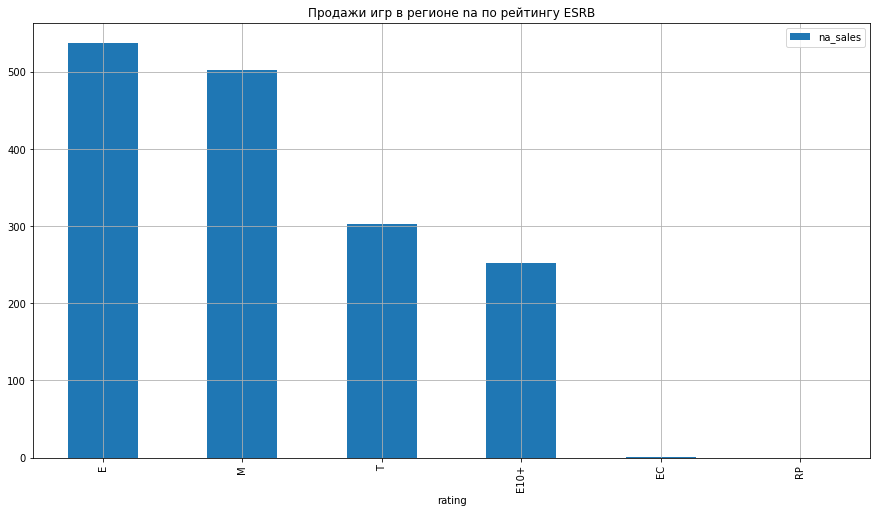

-------------------------------------------------

Топ- 5 игр региона eu по платформам, с долями от продаж


,platform,eu_sales,part_sales
0,PS3,293.73,0.242694
1,X360,234.88,0.194069
2,Wii,170.74,0.141074
3,PS4,141.09,0.116575
4,PC,92.17,0.076155



Топ- 5 игр региона eu по жанрам, с долям от продаж


,genre,eu_sales,part_sales
0,Action,310.59,0.256624
1,Shooter,208.35,0.172149
2,Sports,185.19,0.153013
3,Misc,107.00,0.088409
4,Role-Playing,94.46,0.078047


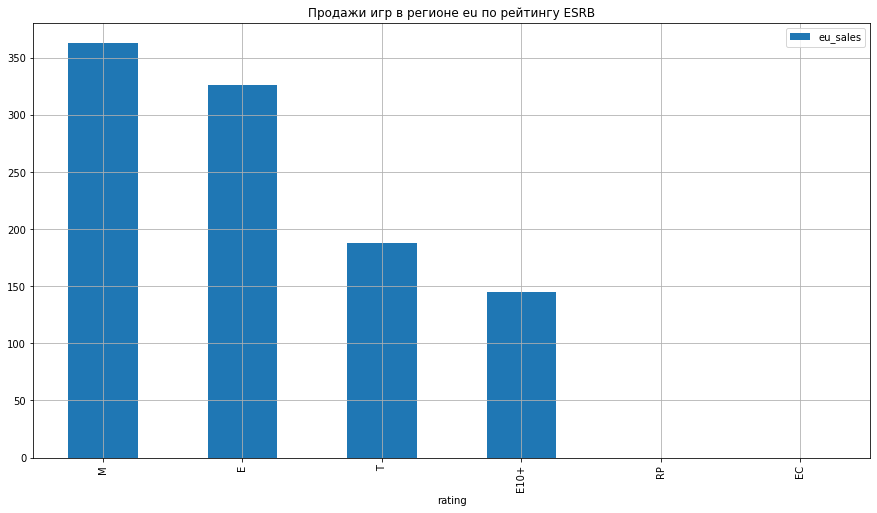

-------------------------------------------------

Топ- 5 игр региона jp по платформам, с долями от продаж


,platform,jp_sales,part_sales
0,3DS,100.62,0.235490
1,DS,76.12,0.178150
2,PS3,74.11,0.173446
3,PSP,60.46,0.141500
4,Wii,47.01,0.110022



Топ- 5 игр региона jp по жанрам, с долям от продаж


,genre,jp_sales,part_sales
0,Role-Playing,138.12,0.323254
1,Action,90.16,0.211009
2,Misc,37.33,0.087367
3,Sports,30.69,0.071826
4,Adventure,23.36,0.054671


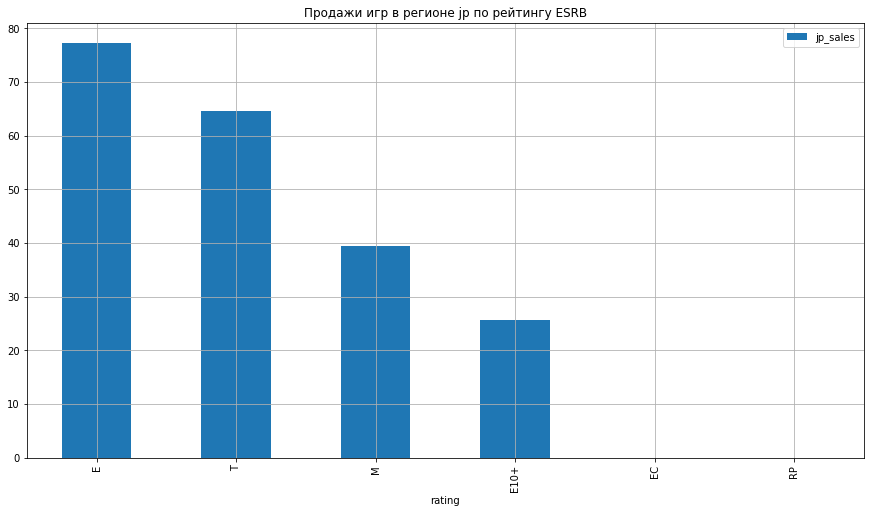

-------------------------------------------------


In [22]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    print()
    print('Топ- 5 игр региона {} по платформам, с долями от продаж'.format(i[:2]))
    b = pd.pivot_table(last_years, index='platform', values=i, aggfunc='sum').sort_values(i, ascending=False)
    b.reset_index(inplace=True)
    b['part_sales'] = b[i] / b[i].sum()
    b = b.loc[:4]
    display(b)
    print()
    print('Топ- 5 игр региона {} по жанрам, с долям от продаж'.format(i[:2]))
    c = pd.pivot_table(last_years, index='genre', values=i, aggfunc='sum').sort_values(i, ascending=False)
    c.reset_index(inplace=True)
    c['part_sales'] = c[i] / c[i].sum()
    c = c.loc[:4]
    display(c)
    print()
    d = pd.pivot_table(last_years, index='rating', values=i, aggfunc='sum').sort_values(i, ascending=False)
    d.reset_index(inplace=True)
    d.plot(x='rating', y=i, kind='bar', grid=True, title='Продажи игр в регионе {} по рейтингу ESRB'.format(i[:2]), figsize=(15, 8))
    plt.show()
    print('-------------------------------------------------')

Самые популярные игровые платформы в Северной Америки те же, что в Европе - PS3, X360, Wii, PS4, PC (DS для Америки).  
Самые популярные игровые платформы в Японии - 3DS, DS, PS3, PSP, Wii.

Самые популярные игровые жанры в Северной Америке и Европе - Action, Shooter, Sports, Misc, Role-Playing.
В Японии - Role-Playing, Action, Misc, Sports, Adventure. Японцы любят ролевые игры больше, чем стрелялки.

В Северной Америке и Европе лучше других продаются игры с рейтингом 'M' и 'E', а в Японии с рейтингом 'E' и 'T'.

## Шаг 5. Проверка гипотез<a name="5.">
[<font size="2">(к содержанию)</font>](#to_content.)

Импортируем модуль `stats` из библиотеки **scipy**, для проверки статистических гипотез. Проверять будем методом **ttest_ind** Саму проверку опишем функцией.   
Сначала, опишем функцию для определения параметра `equal_var`, нашего метода, при помощи теста Левена. Затем опишем саму функцию проверки гипотезы, которой будем передавать 2 массива выбранных данных.

In [23]:
from scipy import stats as st


def equal_var_bool(series1, series2):
    a = st.levene(series1, series2)
    if a.pvalue > 0.05:
        return False
    else:
        return True


def check_hip(massive1, massive2):
    result = st.ttest_ind(massive1, massive2, 
                          equal_var=equal_var_bool(massive1, massive2))
    print('p-значение равно: ', result.pvalue)
    if result.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получается отвергнуть нулевую гипотезу')

Значение **alpha** оставим по умолчанию 0.05. Выберем интересующие нас массивы данных, затем передадим их функции.  
Метод не работает при наличии пропусков, поэтому передавать будем массивы без них.  
Первая гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Раз они равны, то это и есть нулевая гипотеза Ho, её мы и будем проверять.

In [24]:
alpha = 0.05
xone_user_score = last_years[last_years['platform'] == 'XOne']['user_score']
pc_user_score = last_years[last_years['platform'] == 'PC']['user_score']

check_hip(xone_user_score.dropna(), pc_user_score.dropna())

p-значение равно:  0.11111296036738469
Не получается отвергнуть нулевую гипотезу


Гипотезу отвергнуть не удалось, так как среднее одного массива можно случайно встретить в другом, с вероятностью в 11%.  
Проверим вторую гипотезу. Она звучит так: "Средние пользовательские рейтинги жанров Action и Sports разные". Формулируем нулевую гипотезу о равенстве. То есь о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Значение alpha снизим до 0.03, так как данные есть не все, и такое возможно хотя бы в 3% случаев, гипотезу отвергать не будем.

In [25]:
alpha = 0.03
action_user_score = last_years[last_years['genre'] == 'Action']['user_score']
sports_user_score = last_years[last_years['genre'] == 'Sports']['user_score']

check_hip(action_user_score.dropna(), sports_user_score.dropna())

p-значение равно:  1.9150743334562065e-15
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, то есть гипотезу о равенстве. Даже снижение порога alpha не помогло. Имеем право согласиться с предложенной гипотезой о том, что средние рейтинги разные.

## Шаг 6. Общий вывод<a name="6.">
[<font size="2">(к содержанию)</font>](#to_content.)

При подготовке данных, мы:

- ознакомились с данными,

- проверили их на наличие дубликатов,

- привели названия столбцов к нижнему регистру,

- избавились от аббревиатуры **tbd** в столбце `user_score`,

- запонили нулями пропуски в столбце `year_of_release`,

- привели к нужному типу данных столбцы `year_of_release`, `user_score`, - `int` и `float` соответственно

- добавили столбец `total_sales` с общим количеством продаж, суммировав данные по столбцам `na_sales`, `eu_sales` и `jp_sales` для каждой игры,

### При проведении исследовательского анализа данных, было определено:
- Индустрия игр начала активно развиваться после 1994 года (их производство тогда удвоилось) и после этого стабильно росло, но настоящий "взрыв" произошёл в начале 2000-х годов.
- Значимый период для прогноза - последние **9** лет, так как именно за такой период, в среднем, "расцветают" и "отмирают" игровые платформы, и опираясь на него можно спрогнозировать тенденции 2017 года.
- Потенциально прибыльные платформы - **PS4**, **XOne**, **3DS**, **PSV**, **PC** и **WiiU**. Значительно упали продажи для платформ **PS2**, **PS3**, **X360**, **Wii**, **DS** и **PSP**. Перестали выпускаться игры для платформ **XB** и **DC**. В тоже время, намечен общий тренд на снижение появления новых игр, - пик пришёлся на 2008 и 2009 годы, и продажи игр для всех платформ снизились. Наверное, снизился запрос в обществе.
- Огромные продажи для платформ **PS3**	и **X360**, превышающие 800 миллионов копий для каждой, являются выбросами из общей картины распределения. Медианное значение находится в районе 150 млн, а 3 квартиль не превышает 400 млн. Продажи игр для платформы **Wii** так же слишком высоки относительно других - более 600 млн копий, и не отражают общей картины, однако, попадают в верхний "ус".
- Влияние отзывов критиков ощущается, в целом, сильнее отзывов пользователей. Существенная корреляции между отзывами последних и продажами игр была выявлена только для платформы **WiiU** - 0.4, и даже превысила зависимость от мнения критиков (0.35). В остальных случаях коэффициент редко доходит до 0.2. Вероятно, потому что пользовательский опыт слишком субъективен, поэтому к нему прислушиваются далеко не все. Отзывы критиков слабо влияли на продажи только для платформы **PSV** - 0.13, в остальных случаях коэффициент составлял 0.3-0.4. Возможно, просто по ним было недостаточно данных.
- Самыми продаваемыми жанрами являются **'Action'**, **'Shooter'** и **'Sports'**. Самые низкие продажи у жанров **Adventure**, **Strategy** и **Puzzle**. Однако, за последние 9 лет, соответствии с общей тенденцией, снизились продажи игр даже самых востребованных жанров.

### При составлении портрета пользователей каждого региона, было обнаружено:

- 5 самых популярных игровых платформ для Северной Америки и Европы примерно совпадают, это **PS3**, **X360**, **Wii**, **PS4**, **PC** (**DS** для Америки). Общая доля игр для этих платформ составляет 82% для Северной Америки и 75% для Европы.
- 5 самых популярных игровых платформ для Японии это **3DS**, **DS**, **PS3**, **PSP**, **Wii**. То есть, местные производители. Американского XBox тут нет. Общая доля игр на таких платформах составляет в Японии 84%.  

- 5 самых популярных игровых жанров:
    - для Северной Америки и Европы это: **Action**, **Shooter**, **Sports**, **Misc**, **Role-Playing**.
    - для Японии: **Role-Playing**, **Action**, **Misc**, **Sports**, **Adventure**.  
*Предпочтения американских и европейских пользователей полностью совпадают. Но вот японские геймеры больше всего любят ролевые игры - 32%.*

- В Северной Америке и Европе лучше других продаются игры с рейтингом ESRB - **M** (для взрослых) и **E** (для всех), а в Японии с рейтингом **E** (для всех) и **T** (для подростков). Либо японские подростки играют больше западных, либо в Японии в целом подростковые игры популярнее и среди представителей других возрастных групп.

Портрет пользователя Северной Америки и Европы почти одинаков, а вот жители Японии явно имеют другие предпочтения.

### При проверке предложенных гипотез:
- Гипотезу о том, что средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые, отвергнуть не удалось. Есть основания считать, что это так.
- Гипотеза о том, что средние пользовательские рейтинги жанров **Action** и **Sports** разные, скорее подтвердилась. Альтернативная гипотеза (о равенстве их рейтингов) была отвергнута.